<a href="https://colab.research.google.com/github/Yogeshv01/SQL_PROJECTS_BY_CLASS/blob/main/RMF_Analysis_Using_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Propensity model
 Propensity modelling is customer insight technique which utilizes past observation analysis to predict future behavior. A single view of the consumer is created by data analytics so as to identify who the target is for the current or new products and/or services depending on the value they expect to contribute. Propensity simply predicts the likelihood that a customer will behave or act in a certain way in future.

# PROBLEM statement
We have large number of customers. Our sales team would like to call potential customers who can by our service. We don't have to enough manpower & time to call & reach every customer & convinence them for our products. Also we need to rank customer so that we could offer them our product & services with discounted price.

# Workflow 
-Customer Segmentation.

-Potential Vs Non-potential.

-Who Can Buy Our Services In Current Month? (Predicted Sales For 30, 60, 90 days)

-Customer Lifetime Values(CLTV). Live Vs Dead Customers

-Cohort Analysis.

-Lifetime Package. (Recency, Frequency, Monetory, Analysis)

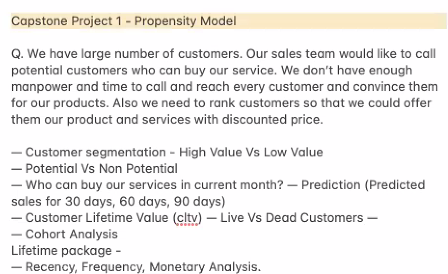

# IMPORTING PACKAGES

In [2]:
#import pandas and numpy module:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
from numpy import *
import datetime as dt

# Load the Data

In [6]:
Online_Retail = pd.read_excel('/content/drive/MyDrive/Rajesh_Class/Files/Online Retail.xlsx')


# Overview The Input Data

In [7]:
Online_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
# Checking the Info;
Online_Retail.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
Online_Retail.shape

(541909, 8)

In [10]:
# Firstly we have convert date into date time format;
Online_Retail['InvoiceDate'] = pd.to_datetime(Online_Retail.InvoiceDate)
Online_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
# Describe function
Online_Retail.describe ()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Need to see first 20 reords
Online_Retail.head (20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Need to see last 20 reords
Online_Retail.head (20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Need to see sample 20 reords
Online_Retail.sample (20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
237759,557885,22667,RECIPE BOX RETROSPOT,6,2011-06-23 13:37:00,2.95,12465.0,Belgium
188111,553014,21787,RAIN PONCHO RETROSPOT,5,2011-05-12 18:49:00,0.85,13451.0,United Kingdom
24303,538349,20696,FLORAL SOFT CAR TOY,1,2010-12-10 14:59:00,7.62,NaN,United Kingdom
515248,579777,85174,S/4 CACTI CANDLES,1,2011-11-30 15:13:00,10.79,NaN,United Kingdom
24569,538349,22341,LOVE GARLAND PAINTED ZINC,1,2010-12-10 14:59:00,1.64,NaN,United Kingdom
121771,546782,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2011-03-17 09:13:00,7.95,15291.0,United Kingdom
106132,545312,22055,MINI CAKE STAND HANGING STRAWBERY,3,2011-03-01 13:51:00,1.65,15456.0,United Kingdom
353009,C567716,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",-1,2011-09-22 10:16:00,4.95,14543.0,United Kingdom
82901,543274,22784,LANTERN CREAM GAZEBO,2,2011-02-06 12:48:00,4.95,17392.0,United Kingdom
408876,572033,23205,CHARLOTTE BAG VINTAGE ALPHABET,10,2011-10-20 11:58:00,0.85,14447.0,United Kingdom


# Checking the Null Values

In [ ]:
# Need to check the Null Entries
Online_Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Firstly need to fill the 'No Records' in Description column and check 'No records' showing or not
Online_Retail["Description"].fillna("No Records", inplace = True)
Online_Retail.sample (20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
130793,547510,21675,BUTTERFLIES STICKERS,12,2011-03-23 13:42:00,0.85,15245.0,United Kingdom
277666,561147,21641,ASSORTED TUTTI FRUTTI KEYRING BALL,48,2011-07-25 13:06:00,0.29,16841.0,United Kingdom
59206,541277,48188,DOORMAT WELCOME PUPPIES,1,2011-01-17 11:46:00,7.95,12673.0,Germany
53129,540821,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2011-01-11 13:16:00,3.36,NaN,United Kingdom
346561,567189,23315,IVORY REFECTORY CLOCK,2,2011-09-19 09:10:00,9.95,17069.0,United Kingdom
82047,543187,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2011-02-04 11:43:00,4.95,14778.0,United Kingdom
222472,556428,20712,JUMBO BAG WOODLAND ANIMALS,7,2011-06-10 13:23:00,4.13,NaN,United Kingdom
217488,555924,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2011-06-07 17:12:00,5.79,NaN,United Kingdom
338578,566561,22274,FELTCRAFT DOLL EMILY,6,2011-09-13 12:13:00,2.95,18145.0,United Kingdom
285014,561894,21984,PACK OF 12 PINK PAISLEY TISSUES,1,2011-07-31 15:00:00,0.29,14456.0,United Kingdom


In [ ]:
# Again check the null values
Online_Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Now handled null values in Customer_ID column
Online_Retail_1 =Online_Retail.dropna(subset=['CustomerID'])
Online_Retail_1.sample (20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
422259,573074,22585,PACK OF 6 BIRDY GIFT TAGS,12,2011-10-27 14:03:00,1.25,16265.0,United Kingdom
166115,550899,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-04-21 12:07:00,2.95,13505.0,Switzerland
17648,537772,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2010-12-08 12:35:00,2.95,18043.0,United Kingdom
57677,541216,21242,RED RETROSPOT PLATE,4,2011-01-14 13:52:00,1.69,15311.0,United Kingdom
217776,C555935,21084,SET/6 COLLAGE PAPER CUPS,-24,2011-06-08 09:14:00,0.19,12567.0,France
346226,567183,21807,WHITE CHRISTMAS STAR DECORATION,36,2011-09-18 15:32:00,0.42,14769.0,United Kingdom
533139,581015,23416,CHAMBRE HOOK,12,2011-12-07 09:35:00,0.39,13949.0,United Kingdom
426409,573348,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-10-30 12:27:00,0.95,14487.0,United Kingdom
334164,566233,23345,DOLLY GIRL BEAKER,12,2011-09-11 11:04:00,1.25,12635.0,Germany
358797,568163,23395,BELLE JARDINIERE CUSHION COVER,2,2011-09-25 12:34:00,3.75,14540.0,United Kingdom


In [ ]:
Online_Retail_1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Checking the Duplicate Values

In [ ]:
# Now need to check the duplicate records
Online_Retail_1.duplicated().sum()

5225

In [ ]:
# Remove these duplicates using drop function
Online_Retail_1 = Online_Retail_1.drop_duplicates()

In [ ]:
Online_Retail_1.duplicated().sum()

0